# Data dan sumber data
1. Cacar Air:  https://data.mendeley.com/datasets/dfztdtfsxz/1, https://www.kaggle.com/datasets/sachinkumar413/monkeypox-images-dataset, https://dermnetnz.org/images/varicella-images, dan https://paperswithcode.com/dataset/mcsi
2. Eczema: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
3. Jerawat: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
4. Kudis atau Scabies: https://data.mendeley.com/datasets/yj3md44hxg/1 dan https://www.kaggle.com/datasets/shubhamgoel27/dermnet
5. Kurap atau ringworm: https://www.kaggle.com/datasets/rikimartuaskripsi/skin-diseases-data?select=Ringworm
6. Kutil atau warts: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
7. Lupus: https://www.kaggle.com/datasets/arindamsaha07/skin-diesease-image-dataset
8. Psoriasis: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download
9. Rosacea: https://www.kaggle.com/datasets/arindamsaha07/skin-diesease-image-dataset
10. Vitiligo: https://www.kaggle.com/datasets/pacificrm/skindiseasedataset?resource=download


# **1. Data Understanding**

### 1.1 Import Library

In [ ]:
# Library umum
import os
import random
import shutil
import math

# Library visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image, ImageOps

# Library Deeplearning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tf_keras
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from collections import defaultdict
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

### 1.2 Download dan Unzip Dataset

In [ ]:
# Download Dataset
! wget https://github.com/CapstoneLAI25SM019/dermacare-skin-disease-classification/raw/main/Dataset.zip

--2025-06-11 08:45:41--  https://github.com/CapstoneLAI25SM019/dermacare-skin-disease-classification/raw/main/Dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/CapstoneLAI25SM019/dermacare-skin-disease-classification/main/Dataset.zip [following]
--2025-06-11 08:45:42--  https://media.githubusercontent.com/media/CapstoneLAI25SM019/dermacare-skin-disease-classification/main/Dataset.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349967019 (334M) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>] 333.75M   386MB/s    in 0.9s 

In [ ]:
# unzip Filenya
! unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/
   creating: Dataset/Cacar Air/
  inflating: Dataset/Cacar Air/Cacar air 1.jpg  
  inflating: Dataset/Cacar Air/Cacar air 10.jpg  
  inflating: Dataset/Cacar Air/Cacar air 11.jpg  
  inflating: Dataset/Cacar Air/Cacar air 12.jpg  
  inflating: Dataset/Cacar Air/Cacar air 13.jpeg  
  inflating: Dataset/Cacar Air/Cacar air 2.jpeg  
  inflating: Dataset/Cacar Air/Cacar air 3.jpg  
  inflating: Dataset/Cacar Air/Cacar air 4.jpg  
  inflating: Dataset/Cacar Air/Cacar air 5.jpg  
  inflating: Dataset/Cacar Air/Cacar air 6.jpg  
  inflating: Dataset/Cacar Air/Cacar air 7.jpg  
  inflating: Dataset/Cacar Air/Cacar air 8.jpg  
  inflating: Dataset/Cacar Air/Cacar air 9.jpg  
  inflating: Dataset/Cacar Air/ChickenPox (10).jpeg  
  inflating: Dataset/Cacar Air/ChickenPox (10).jpg  
  inflating: Dataset/Cacar Air/ChickenPox (10).png  
  inflating: Dataset/Cacar Air/ChickenPox (100).jpg  
  inflating: Dataset/Cacar Air/ChickenPox (101).jpg  
  in

In [ ]:
# Folder asli dataset
original_dir = 'Dataset'

# Folder baru untuk dataset yang sudah dibersihkan dan diproses
cleaned_dir = 'dataset_cleaned'

# Folder tujuan dataset yang sudah dibagi
split_dir = 'dataset_split'

Mengecek isi folder: Dataset

🔹 Kelas 'Cacar Air': 400 gambar
🔹 Kelas 'Eczema': 541 gambar
🔹 Kelas 'Jerawat': 586 gambar
🔹 Kelas 'Kudis': 420 gambar
🔹 Kelas 'Kurap': 400 gambar
🔹 Kelas 'Kutil': 552 gambar
🔹 Kelas 'Lupus': 485 gambar
🔹 Kelas 'Psoriasis': 622 gambar
🔹 Kelas 'Rosacea': 400 gambar
🔹 Kelas 'Vitiligo': 401 gambar

 Total seluruh gambar: 4807


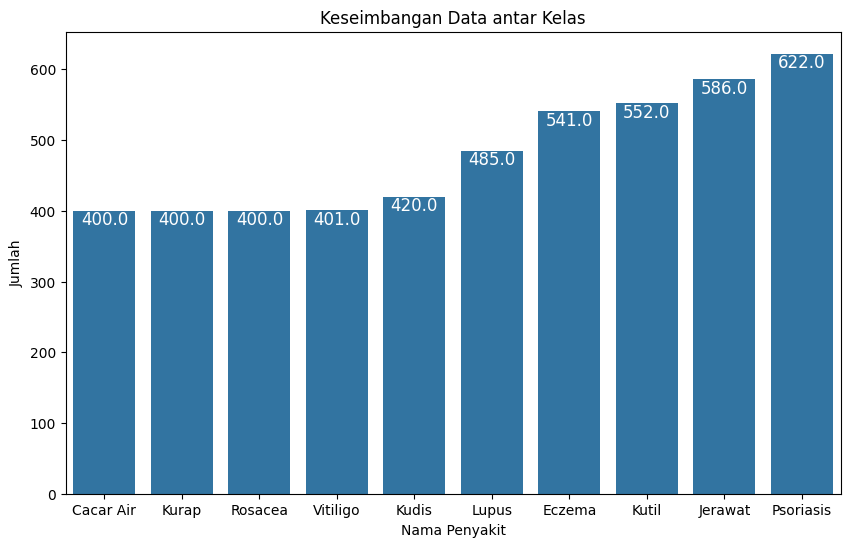

In [ ]:
# Membaca isi folder dataset, apakah sebuah path adalah folder, menggabungkan path dengan aman dan membuat folder baru jika belum ada

# Format file gambar yang diakui
image_extensions = ('.jpg', '.jpeg', '.png')

total_images = 0
class_names_data = {}
print(f"Mengecek isi folder: {original_dir}\n")

for class_name in sorted(os.listdir(original_dir)):
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(image_extensions)]
    count = len(image_files)
    total_images += count
    class_names_data[class_name] = count
    print(f"🔹 Kelas '{class_name}': {count} gambar")

print(f"\n Total seluruh gambar: {total_images}")

# Visualisasi keseimbangan Data
dataset_df = pd.DataFrame(list(class_names_data.items()), columns=['Kelas', 'Jumlah']).sort_values(by='Jumlah')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dataset_df, x='Kelas', y='Jumlah')
for p in ax.patches:
  plt.text(x=p.get_x() + p.get_width()/2,
           y=p.get_height(),
           s=f'{p.get_height()}',
           ha='center',
           va='top',
           color='white',
           size=12)
plt.xlabel('Nama Penyakit')
plt.ylabel('Jumlah')
plt.title('Keseimbangan Data antar Kelas')
plt.show()

In [ ]:
# Menunjukkan salah satu gambar dari setiap kelas

# Mengambil semua nama kelas
class_names = sorted([d for d in os.listdir(original_dir) if os.path.isdir(os.path.join(original_dir, d))])

# Membuat kamus yang menyimpan daftar file gambar per kelas
class_images = {
    class_name: os.listdir(os.path.join(original_dir, class_name))
    for class_name in class_names
}

# Menentukan ukuran grid
cols = 5
rows = int(np.ceil(len(class_names) / cols))

# Plot
fig, axs = plt.subplots(rows, cols, figsize=(18, 9))
axs = axs.flatten()

for idx, class_name in enumerate(class_names):
    image_list = class_images[class_name]
    if len(image_list) == 0:
        continue  # skip kelas yang kosong
    img_file = np.random.choice(image_list)
    img_path = os.path.join(original_dir, class_name, img_file)

    try:
        img = Image.open(img_path).convert("RGB")
        axs[idx].imshow(img)
        axs[idx].set_title(class_name, fontsize=16)
        axs[idx].axis('off')
    except:
        axs[idx].axis('off')  #skip jika ada error buka gambar

#mengosongkan axis yang tidak terpakai
for i in range(len(class_names), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# **2. Data Preparation**


 Dataset telah dibersihkan dan disimpan di: dataset_cleaned

 Menampilkan gambar dari masing-masing kelas...


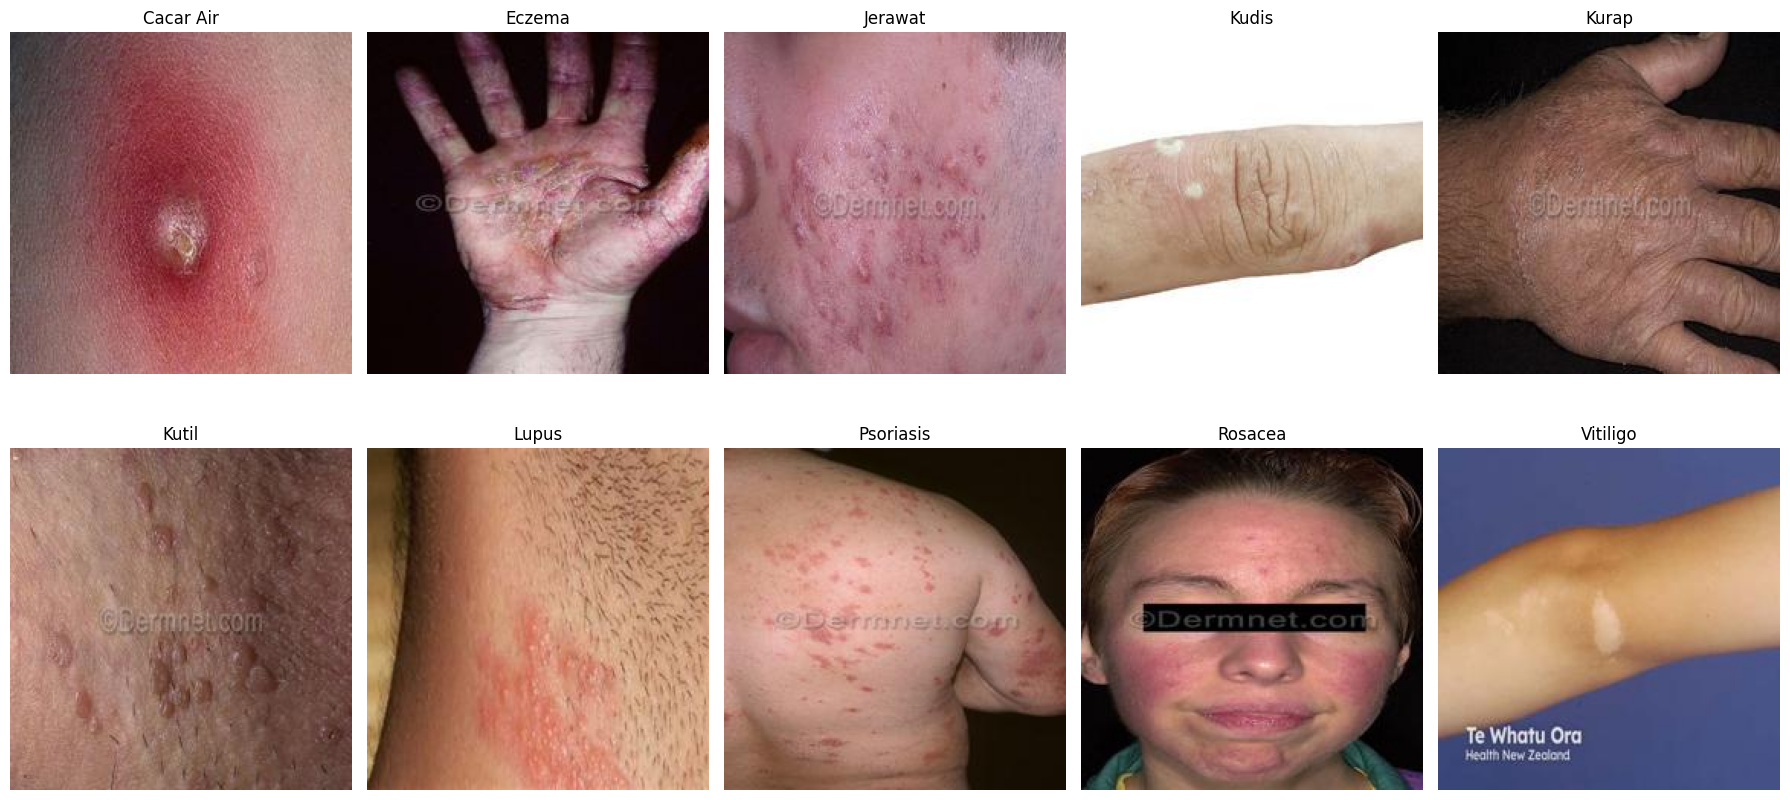

In [ ]:
os.makedirs(cleaned_dir, exist_ok=True)

image_size = (224, 224)
cleaned_images = {}

# Loop tiap kelas
class_names = sorted(os.listdir(original_dir))
for class_name in class_names:
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    cleaned_class_path = os.path.join(cleaned_dir, class_name)
    os.makedirs(cleaned_class_path, exist_ok=True)

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(image_extensions)]

    if not image_files:
        print(f"Gambar tidak ditemukan di kelas: {class_name}")
        continue

    for file in image_files:
        source_path = os.path.join(class_path, file)
        destination_path = os.path.join(cleaned_class_path, file)

        try:
            with Image.open(source_path) as img:
                cleaned = img.convert('RGB').resize(image_size)
                cleaned.save(destination_path)

        except Exception:
            print(f"Gagal memproses {source_path}: {Exception}")

    # Simpan satu contoh gambar yang sudah dibersihkan
    example_file = image_files[0]
    example_path = os.path.join(cleaned_class_path, example_file)
    try:
        with Image.open(example_path) as img:
            cleaned_images[class_name] = img.copy()
    except:
        print(f"Gagal membuka gambar dari {example_path}")

print("\n Dataset telah dibersihkan dan disimpan di:", cleaned_dir)

# ==== Visualisasi hasil cleaning ====
print("\n Menampilkan gambar dari masing-masing kelas...")

cols = 5
rows = int(np.ceil(len(cleaned_images) / cols))
fig, axs = plt.subplots(rows, cols, figsize=(18, 9))
axs = axs.flatten()

for idx, (class_name, img) in enumerate(cleaned_images.items()):
    axs[idx].imshow(img)
    axs[idx].set_title(class_name, fontsize=12)
    axs[idx].axis('off')

# Kosongkan sisa grid
for i in range(len(cleaned_images), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image_dict = defaultdict(list)

# Membaca folder sebagai label
for class_name in class_names:
    class_path = os.path.join(cleaned_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = sorted([f for f in os.listdir(class_path) if f.lower().endswith(image_extensions)])
    image_dict[class_name].extend(images)

# Mengonversi ke bentuk list
images, labels = [], []
for class_name, image_list in image_dict.items():
  for image in image_list:
    images.append(image)
    labels.append(class_name)

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Buat folder train, val, test berdasarkan label folder asli
for subset in ["train", "val", "test"]:
    for label in image_dict.keys():
        os.makedirs(os.path.join(split_dir, subset, label), exist_ok=True)

# Fungsi pemindahan file berdasarkan kategori folder asli
def move_files(image_list, label_list, subset_name):
    for image, label in zip(image_list, label_list):
        source_path = os.path.join(cleaned_dir, label, image)
        destination_path = os.path.join(split_dir, subset_name, label, image)
        shutil.copy(source_path, destination_path)

# Pindahkan ke folder berdasarkan stratified split
move_files(X_train, y_train, "train")
move_files(X_val, y_val, "val")
move_files(X_test, y_test, "test")

print("Dataset telah berhasil dibagi dan dipindahkan berdasarkan label dari folder")

Dataset telah berhasil dibagi dan dipindahkan berdasarkan label dari folder


In [ ]:
# Melakukan augmentasi pada pada train
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'val')
test_dir = os.path.join(split_dir, 'test')

batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect',
)

val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_flow = train_gen.flow_from_directory(train_dir,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           shuffle=True)
val_flow = val_gen.flow_from_directory(val_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       class_mode='categorical',
                                       shuffle=False)
test_flow = test_gen.flow_from_directory(test_dir,
                                         target_size=image_size,
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)

Found 3845 images belonging to 10 classes.
Found 481 images belonging to 10 classes.
Found 481 images belonging to 10 classes.


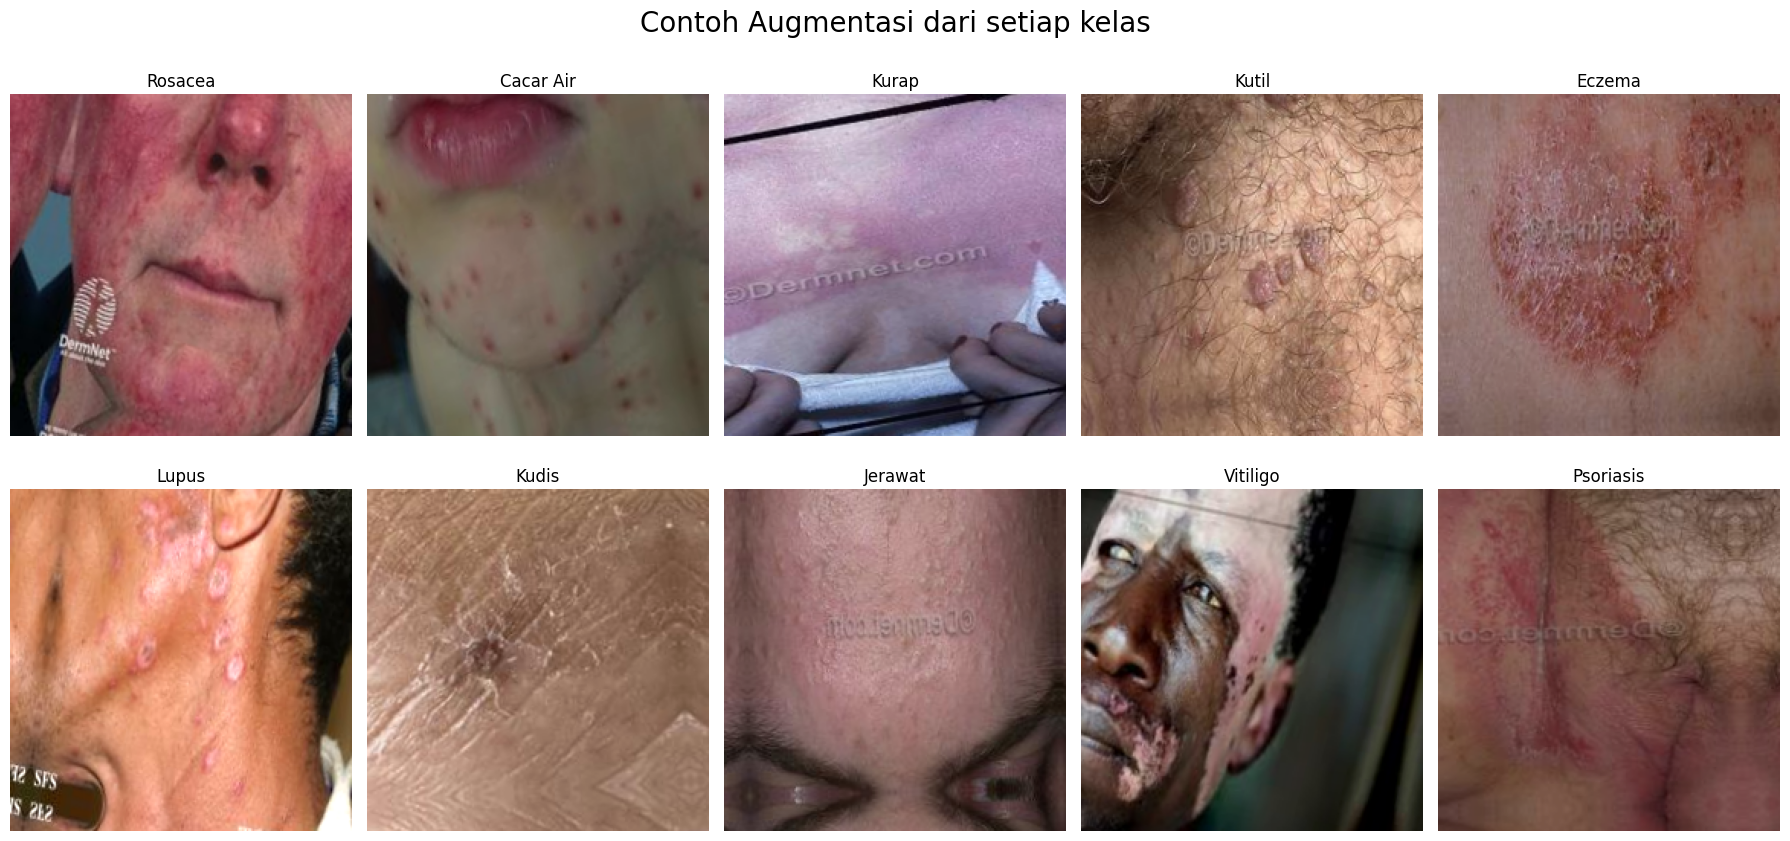

In [ ]:
# Menampilkan 1 contoh dari tiap kelas hasil augmentasi

# Mengambil image dan labelnya serta mapping ke labelnya
train_images, train_labels = next(train_flow)
class_name_dict = train_flow.class_indices
inverse_class_name_dict = {value:key for key,value in class_name_dict.items()}

# Simpan index dari setiap kelas
shown_classes = set()
selected_indices = []

for i in range(len(train_labels)):
  labels = np.argmax(train_labels[i])
  if labels not in shown_classes:
    selected_indices.append(i)
    shown_classes.add(labels)
  if len(shown_classes) == len(inverse_class_name_dict):
    break

# Plot 10 gambar (1 per kelas)
plt.figure(figsize=(18, 9))
for i, image in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[image])
    label_image = np.argmax(train_labels[image])
    label_name = inverse_class_name_dict[label_image]
    plt.title(label_name)
    plt.axis('off')

plt.suptitle('Contoh Augmentasi dari setiap kelas', size=20)
plt.tight_layout()
plt.show()

# **3. Modeling**

### 3.1 Membangun Baseline Model
- Baseline dibangun mengikuti CNN explainer website dengan link dibawah ini :

  [Referensi Baseline Model](https://poloclub.github.io/cnn-explainer/)

In [ ]:
model_base = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')

])

model_base.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih Modelnya
history_base = model_base.fit(train_flow,
                              epochs=10,
                              steps_per_epoch=len(train_flow),
                              validation_data=val_flow,
                              validation_steps=len(val_flow))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 62s 462ms/step - accuracy: 0.1374 - loss: 2.2617 - val_accuracy: 0.2516 - val_loss: 2.1303
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 76s 443ms/step - accuracy: 0.2411 - loss: 2.0732 - val_accuracy: 0.3139 - val_loss: 1.9634
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 56s 463ms/step - accuracy: 0.2711 - loss: 2.0255 - val_accuracy: 0.3202 - val_loss: 1.9253
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 53s 439ms/step - accuracy: 0.2928 - loss: 1.9801 - val_accuracy: 0.3576 - val_loss: 1.8802
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 54s 448ms/step - accuracy: 0.3055 - loss: 1.9278 - val_accuracy: 0.2495 - val_loss: 2.1013
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 451ms/step - accuracy: 0.2876 - loss: 1.9661 - val_accuracy: 0.3701 - val_loss: 1.9062
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 55s 451ms/step - accuracy: 0.3222 - loss: 1.9103 - val_accuracy: 0.3472 - val_loss: 1.8589
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 54s 443ms/step - accuracy: 0.3067 - loss: 1

In [ ]:
def plot_evaluation_model(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epoch = len(loss)

  plt.figure()
  plt.plot(range(epoch), loss, label='Training Loss')
  plt.plot(range(epoch), val_loss, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(range(epoch), acc, label='Training Accuracy')
  plt.plot(range(epoch), val_acc, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

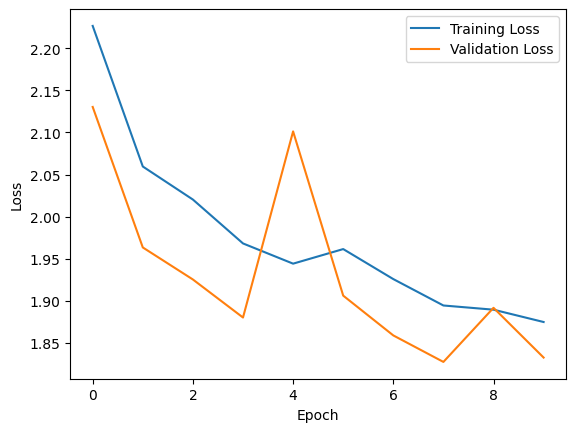

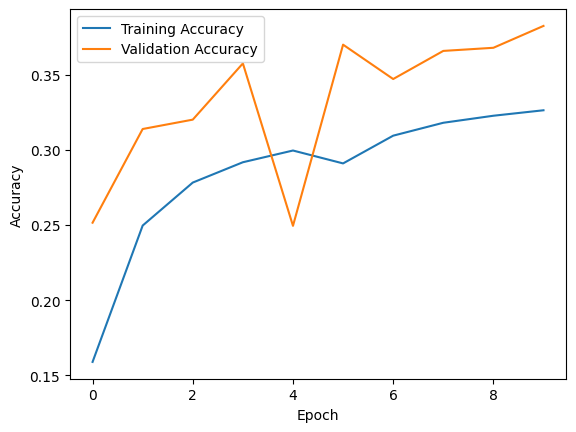

In [ ]:
plot_evaluation_model(history_base)

# **3.2 Modified Model**

- Pada pembangunan model kali ini dilakukan penyesuaian dari jumlah layer dan hyperparameter lainnya

In [ ]:
# Membangun Arsitektur Model
model_modified = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Melakukan Kompilasi Model
model_modified.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                       loss=tf.keras.losses.CategoricalCrossentropy(),
                       metrics=['accuracy'])

model_modified.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,127,530 (99.67 MB)

 Trainable params: 26,127,530 (99.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def callback():
    callbacks = []

    # ModelCheckpoint
    checkpoint_callback = ModelCheckpoint(filepath='best_model.h5',
                                save_best_only=True,
                                monitor='val_accuracy',
                                mode='max', verbose=1)

    callbacks.append(checkpoint_callback)

    # ReduceLROnPlateau callback
    reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss',
                                           factor=0.3,
                                           patience=10,
                                           verbose=1,
                                           mode='auto',
                                           epsilon=0.0001,
                                           cooldown=1,
                                           min_lr=0.00001)

    callbacks.append(reduce_lr_callback)

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=20,
                                   mode='min',
                                   restore_best_weights=True,
                                   verbose=1)

    callbacks.append(early_stopping)

    return callbacks

In [ ]:
# Definisikan kelas dan jumlah sampel
class_names = ["Cacar Air", "Eczema", "Jerawat", "Kudis", "Kurap", "Kutil", "Lupus", "Psoriasis", "Rosacea", "Vitiligo"]
class_counts = np.array([400, 541, 586, 420, 400, 552, 485, 622, 400, 401])

total_samples = np.sum(class_counts)
num_classes = len(class_names)

manual_weights = {class_names[i]: total_samples / (num_classes * class_counts[i]) for i in range(num_classes)}
print("Manual Class Weights:", manual_weights)

Manual Class Weights: {'Cacar Air': np.float64(1.20175), 'Eczema': np.float64(0.888539741219963), 'Jerawat': np.float64(0.8203071672354949), 'Kudis': np.float64(1.1445238095238095), 'Kurap': np.float64(1.20175), 'Kutil': np.float64(0.8708333333333333), 'Lupus': np.float64(0.9911340206185567), 'Psoriasis': np.float64(0.7728295819935691), 'Rosacea': np.float64(1.20175), 'Vitiligo': np.float64(1.1987531172069825)}


In [ ]:
# Pemberian bobot pada kelas gak seimbang
# labels_int = train_flow.labels
# class_weights = compute_class_weight('balanced', classes=np.unique(labels_int), y=labels_int)
# class_weights_dict = dict(enumerate(class_weights))

callbacks = callback()

# Latih Modelnya
history_modified = model_modified.fit(train_flow,
                                      epochs=100,
                                      steps_per_epoch=len(train_flow),
                                      validation_data=val_flow,
                                      validation_steps=len(val_flow),
                                      callbacks=[callbacks],
                                      class_weight=manual_weights)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.1083 - loss: 2.2963
Epoch 1: val_accuracy improved from -inf to 0.22037, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 91s 603ms/step - accuracy: 0.1084 - loss: 2.2961 - val_accuracy: 0.2204 - val_loss: 2.1902 - learning_rate: 1.0000e-04
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.1773 - loss: 2.1905
Epoch 2: val_accuracy improved from 0.22037 to 0.24324, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 121s 559ms/step - accuracy: 0.1773 - loss: 2.1903 - val_accuracy: 0.2432 - val_loss: 2.0568 - learning_rate: 1.0000e-04
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.2133 - loss: 2.1052
Epoch 3: val_accuracy improved from 0.24324 to 0.27443, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 78s 529ms/step - accuracy: 0.2134 - loss: 2.1050 - val_accuracy: 0.2744 - val_loss: 2.0327 - learning_rate: 1.0000e-04
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.2563 - loss: 2.0251
Epoch 4: val_accuracy improved from 0.27443 to 0.32640, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 65s 538ms/step - accuracy: 0.2563 - loss: 2.0251 - val_accuracy: 0.3264 - val_loss: 1.9284 - learning_rate: 1.0000e-04
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.2616 - loss: 1.9833
Epoch 5: val_accuracy did not improve from 0.32640
121/121 ━━━━━━━━━━━━━━━━━━━━ 59s 484ms/step - accuracy: 0.2616 - loss: 1.9833 - val_accuracy: 0.3077 - val_loss: 1.8917 - learning_rate: 1.0000e-04
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.2795 - loss: 1.9643
Epoch 6: val_accuracy improved from 0.32640 to 0.33056, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 481ms/step - accuracy: 0.2795 - loss: 1.9642 - val_accuracy: 0.3306 - val_loss: 1.8482 - learning_rate: 1.0000e-04
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.2847 - loss: 1.9208
Epoch 7: val_accuracy improved from 0.33056 to 0.33264, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 474ms/step - accuracy: 0.2848 - loss: 1.9209 - val_accuracy: 0.3326 - val_loss: 1.8181 - learning_rate: 1.0000e-04
Epoch 8/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.2844 - loss: 1.8963
Epoch 8: val_accuracy improved from 0.33264 to 0.36590, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 59s 481ms/step - accuracy: 0.2845 - loss: 1.8962 - val_accuracy: 0.3659 - val_loss: 1.7804 - learning_rate: 1.0000e-04
Epoch 9/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.3212 - loss: 1.8317
Epoch 9: val_accuracy improved from 0.36590 to 0.39085, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 477ms/step - accuracy: 0.3211 - loss: 1.8319 - val_accuracy: 0.3909 - val_loss: 1.7305 - learning_rate: 1.0000e-04
Epoch 10/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.3163 - loss: 1.8486
Epoch 10: val_accuracy did not improve from 0.39085
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 478ms/step - accuracy: 0.3164 - loss: 1.8486 - val_accuracy: 0.3805 - val_loss: 1.7544 - learning_rate: 1.0000e-04
Epoch 11/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.3262 - loss: 1.8616
Epoch 11: val_accuracy improved from 0.39085 to 0.39917, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 469ms/step - accuracy: 0.3263 - loss: 1.8614 - val_accuracy: 0.3992 - val_loss: 1.6920 - learning_rate: 1.0000e-04
Epoch 12/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.3245 - loss: 1.8069
Epoch 12: val_accuracy did not improve from 0.39917
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 475ms/step - accuracy: 0.3246 - loss: 1.8069 - val_accuracy: 0.3784 - val_loss: 1.6884 - learning_rate: 1.0000e-04
Epoch 13/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.3257 - loss: 1.8234
Epoch 13: val_accuracy did not improve from 0.39917
121/121 ━━━━━━━━━━━━━━━━━━━━ 85s 501ms/step - accuracy: 0.3257 - loss: 1.8233 - val_accuracy: 0.3992 - val_loss: 1.6809 - learning_rate: 1.0000e-04
Epoch 14/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.3488 - loss: 1.7756
Epoch 14: val_accuracy did not improve from 0.39917
121/121 ━━━━━━━━━━━━━━━━━━━━ 80s 487ms/step - accuracy: 0.3488 - loss: 1.7756 - val_accuracy: 0.3742 - val_loss: 1.7061 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 482ms/step - accuracy: 0.3640 - loss: 1.7574 - val_accuracy: 0.4033 - val_loss: 1.7243 - learning_rate: 1.0000e-04
Epoch 16/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.3633 - loss: 1.7428
Epoch 16: val_accuracy improved from 0.40333 to 0.40748, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 489ms/step - accuracy: 0.3633 - loss: 1.7428 - val_accuracy: 0.4075 - val_loss: 1.6571 - learning_rate: 1.0000e-04
Epoch 17/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.3766 - loss: 1.7341
Epoch 17: val_accuracy improved from 0.40748 to 0.41164, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 485ms/step - accuracy: 0.3766 - loss: 1.7341 - val_accuracy: 0.4116 - val_loss: 1.6247 - learning_rate: 1.0000e-04
Epoch 18/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.3685 - loss: 1.7424
Epoch 18: val_accuracy improved from 0.41164 to 0.41372, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 59s 486ms/step - accuracy: 0.3685 - loss: 1.7422 - val_accuracy: 0.4137 - val_loss: 1.6172 - learning_rate: 1.0000e-04
Epoch 19/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.3843 - loss: 1.7041
Epoch 19: val_accuracy improved from 0.41372 to 0.44075, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 479ms/step - accuracy: 0.3843 - loss: 1.7042 - val_accuracy: 0.4407 - val_loss: 1.5627 - learning_rate: 1.0000e-04
Epoch 20/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.3838 - loss: 1.7070
Epoch 20: val_accuracy improved from 0.44075 to 0.44906, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 472ms/step - accuracy: 0.3838 - loss: 1.7070 - val_accuracy: 0.4491 - val_loss: 1.5582 - learning_rate: 1.0000e-04
Epoch 21/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.3861 - loss: 1.7049
Epoch 21: val_accuracy did not improve from 0.44906
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 481ms/step - accuracy: 0.3861 - loss: 1.7049 - val_accuracy: 0.4241 - val_loss: 1.5727 - learning_rate: 1.0000e-04
Epoch 22/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.4236 - loss: 1.6390
Epoch 22: val_accuracy improved from 0.44906 to 0.46362, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 475ms/step - accuracy: 0.4234 - loss: 1.6392 - val_accuracy: 0.4636 - val_loss: 1.5368 - learning_rate: 1.0000e-04
Epoch 23/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.4104 - loss: 1.6569
Epoch 23: val_accuracy did not improve from 0.46362
121/121 ━━━━━━━━━━━━━━━━━━━━ 56s 464ms/step - accuracy: 0.4105 - loss: 1.6569 - val_accuracy: 0.4553 - val_loss: 1.4973 - learning_rate: 1.0000e-04
Epoch 24/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.4139 - loss: 1.6359
Epoch 24: val_accuracy did not improve from 0.46362
121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 471ms/step - accuracy: 0.4138 - loss: 1.6360 - val_accuracy: 0.4262 - val_loss: 1.6426 - learning_rate: 1.0000e-04
Epoch 25/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.4143 - loss: 1.6375
Epoch 25: val_accuracy improved from 0.46362 to 0.48441, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 470ms/step - accuracy: 0.4144 - loss: 1.6374 - val_accuracy: 0.4844 - val_loss: 1.4866 - learning_rate: 1.0000e-04
Epoch 26/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.4132 - loss: 1.6307
Epoch 26: val_accuracy improved from 0.48441 to 0.48649, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 477ms/step - accuracy: 0.4133 - loss: 1.6307 - val_accuracy: 0.4865 - val_loss: 1.5021 - learning_rate: 1.0000e-04
Epoch 27/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.4251 - loss: 1.6081
Epoch 27: val_accuracy did not improve from 0.48649
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 476ms/step - accuracy: 0.4251 - loss: 1.6083 - val_accuracy: 0.4324 - val_loss: 1.6100 - learning_rate: 1.0000e-04
Epoch 28/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.4323 - loss: 1.5917
Epoch 28: val_accuracy did not improve from 0.48649
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 478ms/step - accuracy: 0.4322 - loss: 1.5919 - val_accuracy: 0.4595 - val_loss: 1.5603 - learning_rate: 1.0000e-04
Epoch 29/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.4302 - loss: 1.6029
Epoch 29: val_accuracy did not improve from 0.48649
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 474ms/step - accuracy: 0.4302 - loss: 1.6030 - val_accuracy: 0.4719 - val_loss: 1.5960 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 475ms/step - accuracy: 0.4324 - loss: 1.5562 - val_accuracy: 0.4927 - val_loss: 1.4425 - learning_rate: 1.0000e-04
Epoch 31/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.4268 - loss: 1.5987
Epoch 31: val_accuracy did not improve from 0.49272
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 476ms/step - accuracy: 0.4268 - loss: 1.5984 - val_accuracy: 0.4782 - val_loss: 1.4246 - learning_rate: 1.0000e-04
Epoch 32/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.4429 - loss: 1.5610
Epoch 32: val_accuracy did not improve from 0.49272
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 480ms/step - accuracy: 0.4429 - loss: 1.5609 - val_accuracy: 0.4553 - val_loss: 1.4700 - learning_rate: 1.0000e-04
Epoch 33/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.4347 - loss: 1.5369
Epoch 33: val_accuracy did not improve from 0.49272
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 476ms/step - accuracy: 0.4347 - loss: 1.5370 - val_accuracy: 0.4304 - val_loss: 1.5005 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 474ms/step - accuracy: 0.4397 - loss: 1.5102 - val_accuracy: 0.5052 - val_loss: 1.4459 - learning_rate: 1.0000e-04
Epoch 35/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.4636 - loss: 1.5212
Epoch 35: val_accuracy did not improve from 0.50520
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 471ms/step - accuracy: 0.4636 - loss: 1.5213 - val_accuracy: 0.4927 - val_loss: 1.4071 - learning_rate: 1.0000e-04
Epoch 36/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.4566 - loss: 1.5187
Epoch 36: val_accuracy improved from 0.50520 to 0.50936, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 480ms/step - accuracy: 0.4566 - loss: 1.5187 - val_accuracy: 0.5094 - val_loss: 1.3868 - learning_rate: 1.0000e-04
Epoch 37/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.4584 - loss: 1.5009
Epoch 37: val_accuracy did not improve from 0.50936
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 474ms/step - accuracy: 0.4584 - loss: 1.5009 - val_accuracy: 0.4865 - val_loss: 1.4461 - learning_rate: 1.0000e-04
Epoch 38/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.4604 - loss: 1.5152
Epoch 38: val_accuracy improved from 0.50936 to 0.51975, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 84s 490ms/step - accuracy: 0.4605 - loss: 1.5150 - val_accuracy: 0.5198 - val_loss: 1.3887 - learning_rate: 1.0000e-04
Epoch 39/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.4686 - loss: 1.4639
Epoch 39: val_accuracy did not improve from 0.51975
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 479ms/step - accuracy: 0.4686 - loss: 1.4640 - val_accuracy: 0.4886 - val_loss: 1.3878 - learning_rate: 1.0000e-04
Epoch 40/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.4692 - loss: 1.4630
Epoch 40: val_accuracy did not improve from 0.51975
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 478ms/step - accuracy: 0.4692 - loss: 1.4630 - val_accuracy: 0.5198 - val_loss: 1.3785 - learning_rate: 1.0000e-04
Epoch 41/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.4743 - loss: 1.4713
Epoch 41: val_accuracy did not improve from 0.51975
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 478ms/step - accuracy: 0.4743 - loss: 1.4712 - val_accuracy: 0.4823 - val_loss: 1.4381 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 479ms/step - accuracy: 0.4912 - loss: 1.4440 - val_accuracy: 0.5239 - val_loss: 1.3552 - learning_rate: 1.0000e-04
Epoch 44/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.4975 - loss: 1.4204
Epoch 44: val_accuracy did not improve from 0.52391
121/121 ━━━━━━━━━━━━━━━━━━━━ 81s 471ms/step - accuracy: 0.4974 - loss: 1.4205 - val_accuracy: 0.5177 - val_loss: 1.4317 - learning_rate: 1.0000e-04
Epoch 45/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.4945 - loss: 1.4142
Epoch 45: val_accuracy did not improve from 0.52391
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 475ms/step - accuracy: 0.4944 - loss: 1.4143 - val_accuracy: 0.5052 - val_loss: 1.4181 - learning_rate: 1.0000e-04
Epoch 46/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.4793 - loss: 1.4577
Epoch 46: val_accuracy did not improve from 0.52391
121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 481ms/step - accuracy: 0.4793 - loss: 1.4575 - val_accuracy: 0.5031 - val_loss: 1.4998 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 59s 491ms/step - accuracy: 0.4966 - loss: 1.3834 - val_accuracy: 0.5301 - val_loss: 1.3234 - learning_rate: 1.0000e-04
Epoch 53/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.5106 - loss: 1.3647
Epoch 53: val_accuracy did not improve from 0.53015
121/121 ━━━━━━━━━━━━━━━━━━━━ 59s 484ms/step - accuracy: 0.5106 - loss: 1.3647 - val_accuracy: 0.4927 - val_loss: 1.3949 - learning_rate: 1.0000e-04
Epoch 54/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.5182 - loss: 1.3438
Epoch 54: val_accuracy improved from 0.53015 to 0.53846, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 488ms/step - accuracy: 0.5181 - loss: 1.3440 - val_accuracy: 0.5385 - val_loss: 1.3108 - learning_rate: 1.0000e-04
Epoch 55/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.5234 - loss: 1.3442
Epoch 55: val_accuracy did not improve from 0.53846
121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 473ms/step - accuracy: 0.5234 - loss: 1.3443 - val_accuracy: 0.5031 - val_loss: 1.3162 - learning_rate: 1.0000e-04
Epoch 56/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.5070 - loss: 1.3669
Epoch 56: val_accuracy improved from 0.53846 to 0.54054, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 481ms/step - accuracy: 0.5070 - loss: 1.3668 - val_accuracy: 0.5405 - val_loss: 1.3092 - learning_rate: 1.0000e-04
Epoch 57/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.5195 - loss: 1.3410
Epoch 57: val_accuracy did not improve from 0.54054
121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 471ms/step - accuracy: 0.5194 - loss: 1.3411 - val_accuracy: 0.5260 - val_loss: 1.3388 - learning_rate: 1.0000e-04
Epoch 58/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.4965 - loss: 1.3580
Epoch 58: val_accuracy did not improve from 0.54054
121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 471ms/step - accuracy: 0.4966 - loss: 1.3579 - val_accuracy: 0.4865 - val_loss: 1.4262 - learning_rate: 1.0000e-04
Epoch 59/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.5290 - loss: 1.3068
Epoch 59: val_accuracy did not improve from 0.54054
121/121 ━━━━━━━━━━━━━━━━━━━━ 84s 489ms/step - accuracy: 0.5288 - loss: 1.3071 - val_accuracy: 0.4470 - val_loss: 1.6002 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 59s 492ms/step - accuracy: 0.5316 - loss: 1.2606 - val_accuracy: 0.5738 - val_loss: 1.2894 - learning_rate: 1.0000e-04
Epoch 68/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.5455 - loss: 1.2555
Epoch 68: val_accuracy did not improve from 0.57380
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 487ms/step - accuracy: 0.5454 - loss: 1.2556 - val_accuracy: 0.5551 - val_loss: 1.2878 - learning_rate: 1.0000e-04
Epoch 69/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.5516 - loss: 1.2374
Epoch 69: val_accuracy did not improve from 0.57380
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 478ms/step - accuracy: 0.5516 - loss: 1.2376 - val_accuracy: 0.5031 - val_loss: 1.4596 - learning_rate: 1.0000e-04
Epoch 70/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.5534 - loss: 1.2516
Epoch 70: val_accuracy did not improve from 0.57380
121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 492ms/step - accuracy: 0.5533 - loss: 1.2516 - val_accuracy: 0.5509 - val_loss: 1.2804 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 491ms/step - accuracy: 0.5974 - loss: 1.1308 - val_accuracy: 0.5821 - val_loss: 1.2629 - learning_rate: 3.0000e-05
Epoch 76/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.6018 - loss: 1.1203
Epoch 76: val_accuracy improved from 0.58212 to 0.58836, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 494ms/step - accuracy: 0.6017 - loss: 1.1204 - val_accuracy: 0.5884 - val_loss: 1.2472 - learning_rate: 3.0000e-05
Epoch 77/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.6020 - loss: 1.0985
Epoch 77: val_accuracy did not improve from 0.58836
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 477ms/step - accuracy: 0.6019 - loss: 1.0987 - val_accuracy: 0.5842 - val_loss: 1.2726 - learning_rate: 3.0000e-05
Epoch 78/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.5989 - loss: 1.1056
Epoch 78: val_accuracy did not improve from 0.58836
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 473ms/step - accuracy: 0.5988 - loss: 1.1057 - val_accuracy: 0.5676 - val_loss: 1.2718 - learning_rate: 3.0000e-05
Epoch 79/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.5990 - loss: 1.1079
Epoch 79: val_accuracy did not improve from 0.58836
121/121 ━━━━━━━━━━━━━━━━━━━━ 84s 491ms/step - accuracy: 0.5990 - loss: 1.1079 - val_accuracy: 0.5717 - val_loss: 1.2614 - learning


Epoch 90: ReduceLROnPlateau reducing learning rate to 1e-05.
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 491ms/step - accuracy: 0.6031 - loss: 1.1113 - val_accuracy: 0.5925 - val_loss: 1.2361 - learning_rate: 3.0000e-05
Epoch 91/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.6107 - loss: 1.0781
Epoch 91: val_accuracy did not improve from 0.59252
121/121 ━━━━━━━━━━━━━━━━━━━━ 58s 478ms/step - accuracy: 0.6107 - loss: 1.0779 - val_accuracy: 0.5842 - val_loss: 1.2478 - learning_rate: 1.0000e-05
Epoch 92/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6198 - loss: 1.0510
Epoch 92: val_accuracy did not improve from 0.59252
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 480ms/step - accuracy: 0.6197 - loss: 1.0509 - val_accuracy: 0.5842 - val_loss: 1.2706 - learning_rate: 1.0000e-05
Epoch 93/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.6416 - loss: 0.9998
Epoch 93: val_accuracy improved from 0.59252 to 0.59459, saving model to best_model.h5


121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 494ms/step - accuracy: 0.6415 - loss: 1.0001 - val_accuracy: 0.5946 - val_loss: 1.2359 - learning_rate: 1.0000e-05
Epoch 94/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6247 - loss: 1.0479
Epoch 94: val_accuracy did not improve from 0.59459
121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 472ms/step - accuracy: 0.6247 - loss: 1.0481 - val_accuracy: 0.5800 - val_loss: 1.2678 - learning_rate: 1.0000e-05
Epoch 95/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.6190 - loss: 1.0392
Epoch 95: val_accuracy did not improve from 0.59459
121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 472ms/step - accuracy: 0.6191 - loss: 1.0391 - val_accuracy: 0.5759 - val_loss: 1.2672 - learning_rate: 1.0000e-05
Epoch 96/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6288 - loss: 1.0256
Epoch 96: val_accuracy did not improve from 0.59459
121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 480ms/step - accuracy: 0.6287 - loss: 1.0257 - val_accuracy: 0.5842 - val_loss: 1.2353 - learning

121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 484ms/step - accuracy: 0.6073 - loss: 1.0807 - val_accuracy: 0.6050 - val_loss: 1.2009 - learning_rate: 1.0000e-05
Epoch 100/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6197 - loss: 1.0443
Epoch 100: val_accuracy did not improve from 0.60499
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 479ms/step - accuracy: 0.6197 - loss: 1.0442 - val_accuracy: 0.5925 - val_loss: 1.2203 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 99.


In [ ]:
# Mengevalusasi Model dengan Data Uji
loss, acc = model_modified.evaluate(test_flow)
print(f'Hasil Akurasi model adalah {acc:.3f} dengan loss {loss:.3f} pada data uji')

 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5625 - loss: 1.6769

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6008 - loss: 1.1925
Hasil Akurasi model adalah 0.630 dengan loss 1.066 pada data uji


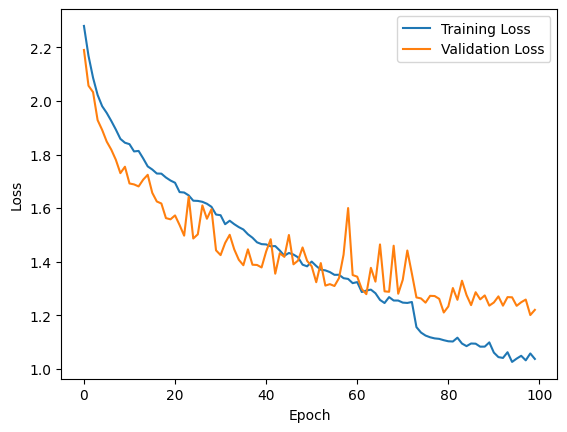

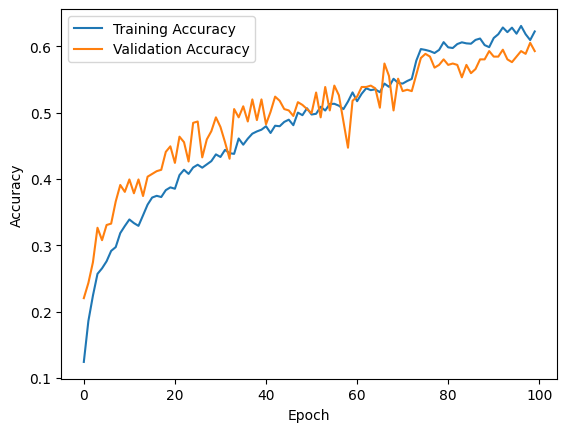

In [ ]:
# Visualisasi Akurasi dan Loss
plot_evaluation_model(history_modified)

### 3.3 Transfer Learning

- Adapun jenis model yang dipakai untuk transfer learning yaitu Mobile Net

In [ ]:
# Melakukan augmentasi pada pada train lagi khusus untul transfer learning
batch_size = 16

train_gen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect',
)

val_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)

train_flow = train_gen.flow_from_directory(train_dir,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           shuffle=True)
val_flow = val_gen.flow_from_directory(val_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       class_mode='categorical',
                                       shuffle=False)
test_flow = test_gen.flow_from_directory(test_dir,
                                         target_size=image_size,
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)

Found 3845 images belonging to 10 classes.
Found 481 images belonging to 10 classes.
Found 481 images belonging to 10 classes.


**3.3.1 Transfer Learning - Feature Extraction**

In [ ]:
# Mengambil Feauture dari model pre-trained
pre_train_model = tf.keras.applications.MobileNet(include_top=False, input_shape=(224,224,3))
pre_train_model.trainable = False

# Membuat Arsitektur Model
mobile_net_model = tf.keras.models.Sequential([
                        tf.keras.layers.Input(shape=(224, 224, 3)),
                        pre_train_model,
                        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same'),
                        tf.keras.layers.ReLU(),
                        tf.keras.layers.MaxPool2D(pool_size=2),

                        tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same'),
                        tf.keras.layers.ReLU(),
                        tf.keras.layers.Conv2D(filters=256, kernel_size=1, padding='same'),
                        tf.keras.layers.ReLU(),
                        tf.keras.layers.MaxPool2D(pool_size=2),

                        tf.keras.layers.GlobalAveragePooling2D(),
                        tf.keras.layers.Dense(units=128, activation='relu'),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(units=10, activation='softmax')
                      ])

# Melakukan kompilasi Model
mobile_net_model.compile(loss=tf.keras.losses.CategoricalFocalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           metrics=['accuracy'])

mobile_net_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 128)      │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 3, 3, 128)      │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 256)      │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,477,130 (17.08 MB)

 Trainable params: 1,248,266 (4.76 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Pemberian bobot pada kelas tidak seimbang
labels_int = train_flow.labels
class_weights = compute_class_weight('balanced', classes=np.unique(labels_int), y=labels_int)
class_weights_dict = dict(enumerate(class_weights))

# Latih Modelnya
initial_epochs = 25
history_pre_fine_tune = mobile_net_model.fit(train_flow,
                                             epochs=initial_epochs,
                                             steps_per_epoch=len(train_flow),
                                             validation_data=val_flow,
                                             validation_steps=len(val_flow),
                                             class_weight=class_weights_dict)

Epoch 1/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 70s 260ms/step - accuracy: 0.1905 - loss: 0.4324 - val_accuracy: 0.4802 - val_loss: 0.2757
Epoch 2/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 71s 224ms/step - accuracy: 0.4228 - loss: 0.2736 - val_accuracy: 0.5551 - val_loss: 0.1966
Epoch 3/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 82s 225ms/step - accuracy: 0.5106 - loss: 0.2152 - val_accuracy: 0.5988 - val_loss: 0.1739
Epoch 4/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 54s 225ms/step - accuracy: 0.5524 - loss: 0.1839 - val_accuracy: 0.6320 - val_loss: 0.1540
Epoch 5/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 53s 221ms/step - accuracy: 0.5972 - loss: 0.1645 - val_accuracy: 0.6507 - val_loss: 0.1474
Epoch 6/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 54s 223ms/step - accuracy: 0.6384 - loss: 0.1469 - val_accuracy: 0.6694 - val_loss: 0.1377
Epoch 7/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 83s 229ms/step - accuracy: 0.6431 - loss: 0.1428 - val_accuracy: 0.6736 - val_loss: 0.1389
Epoch 8/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 53s 219ms/step - accuracy: 0.6724 - loss: 0

**3.3.2 Transfer Learning - Fine Tuning**

In [ ]:
# Unfreeze layer agar dapat dilatih dengan dataset yang ada
pre_train_model.trainable = True
for layer in pre_train_model.layers[:-30]:
  layer.trainable = False

# Melakukan kompilasi Model
mobile_net_model.compile(loss=tf.keras.losses.CategoricalFocalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           metrics=['accuracy'])

In [ ]:
# terapkan beberapa callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, mode='min', restore_best_weights=True, verbose=1)

# Pemberian bobot pada kelas gak seimbang
labels_int = train_flow.labels
class_weights = compute_class_weight('balanced', classes=np.unique(labels_int), y=labels_int)
class_weights_dict = dict(enumerate(class_weights))


# Latih Modelnya
history_fine_tune = mobile_net_model.fit(train_flow,
                                         epochs=initial_epochs+50,
                                         steps_per_epoch=len(train_flow),
                                         validation_data=val_flow,
                                         validation_steps=len(val_flow),
                                         callbacks=[early_stopping],
                                         class_weight=class_weights_dict,
                                         initial_epoch=history_pre_fine_tune.epoch[-1])

Epoch 25/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 78s 266ms/step - accuracy: 0.7151 - loss: 0.1178 - val_accuracy: 0.6757 - val_loss: 0.1377
Epoch 26/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 57s 234ms/step - accuracy: 0.7283 - loss: 0.1035 - val_accuracy: 0.7069 - val_loss: 0.1310
Epoch 27/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 81s 230ms/step - accuracy: 0.7254 - loss: 0.1082 - val_accuracy: 0.6985 - val_loss: 0.1278
Epoch 28/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 55s 229ms/step - accuracy: 0.7510 - loss: 0.0878 - val_accuracy: 0.7214 - val_loss: 0.1241
Epoch 29/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 85s 241ms/step - accuracy: 0.7670 - loss: 0.0873 - val_accuracy: 0.7193 - val_loss: 0.1203
Epoch 30/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 79s 229ms/step - accuracy: 0.7625 - loss: 0.0867 - val_accuracy: 0.7464 - val_loss: 0.1199
Epoch 31/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 56s 233ms/step - accuracy: 0.7901 - loss: 0.0756 - val_accuracy: 0.7318 - val_loss: 0.1180
Epoch 32/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 58s 240ms/step - accuracy: 0.8116 -

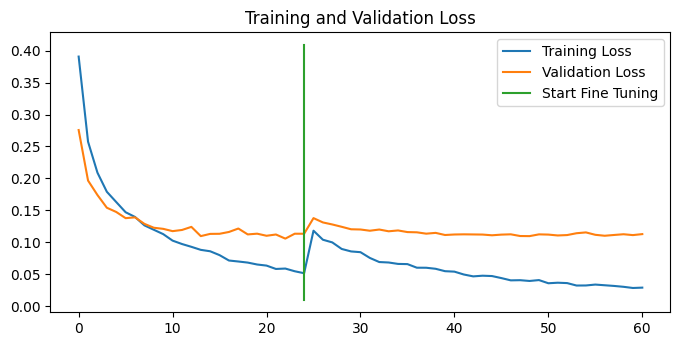

In [ ]:
# Visualisasi Akurasi dan Loss Transfer Learning Mobile Net
def evaluate_combination_plot(history_pre_tune, history_tune, initial_epoch=25):
  loss = history_pre_tune.history['loss'] + history_tune.history['loss']
  val_loss = history_pre_tune.history['val_loss'] + history_tune.history['val_loss']
  acc = history_pre_tune.history['accuracy'] + history_tune.history['accuracy']
  val_acc = history_pre_tune.history['val_accuracy'] + history_tune.history['val_accuracy']

  # Plot akurasinya
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(acc, label='Training Accuracy')        # Catatan kecil --> Tidak perlu sumbu x, matplotlib otomatis pakai index sebagai x (0, 1, 2, ...)
  plt.plot(val_acc, label='Validation Accuracy')
  plt.axvline(initial_epoch-1, label='Start Fine Tuning', color='green')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  # Plot lossnya
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.plot([initial_epoch-1,initial_epoch-1], plt.ylim(), label='Start Fine Tuning')    # alternatif lain untuk membuat garis lurus vertikal harus sesuai tempatnya ya dengan bantuan ylim untuk mennetukan tinggi grafik
  plt.legend()
  plt.title('Training and Validation Loss')

evaluate_combination_plot(history_pre_fine_tune, history_fine_tune)

In [ ]:
# Simpan Modelnya
mobile_net_model.save('model_klasifikasi_kulit.h5')

# **4. Evaluasi Model pada Data Test**

In [ ]:
# Memuat model terbaik
model = load_model('model_klasifikasi_kulit.h5')

In [ ]:
# Evaluasi pada dataset test
test_loss, test_accuracy = model.evaluate(test_flow)
print(f'Hasil Akurasi model adalah {test_accuracy:.3f} dengan loss {test_loss:.3f} pada data uji')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.8305 - loss: 0.6610
Hasil Akurasi model adalah 0.775 dengan loss 0.792 pada data uji


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step


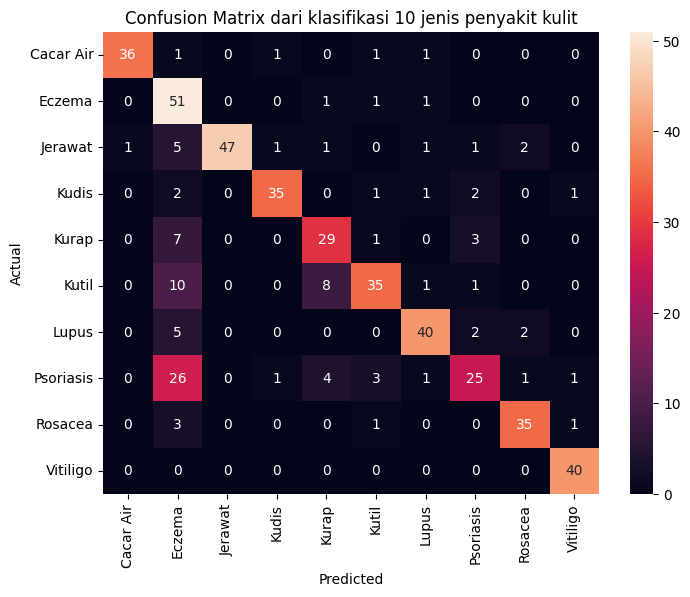

              precision    recall  f1-score   support

   Cacar Air       0.97      0.90      0.94        40
      Eczema       0.46      0.94      0.62        54
     Jerawat       1.00      0.80      0.89        59
       Kudis       0.92      0.83      0.88        42
       Kurap       0.67      0.72      0.70        40
       Kutil       0.81      0.64      0.71        55
       Lupus       0.87      0.82      0.84        49
   Psoriasis       0.74      0.40      0.52        62
     Rosacea       0.88      0.88      0.88        40
    Vitiligo       0.93      1.00      0.96        40

    accuracy                           0.78       481
   macro avg       0.83      0.79      0.79       481
weighted avg       0.82      0.78      0.78       481



In [ ]:
# Cek metrik lainnya

def visualize_confusion():
  # Mengambil nilai test dan prediction
  y_test = test_flow.labels
  y_pred = np.argmax(model.predict(test_flow), axis=-1)

  # Melihat Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
  plt.title('Confusion Matrix dari klasifikasi 10 jenis penyakit kulit')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Melihat classification report
  print(classification_report(y_test, y_pred, target_names=class_names))

visualize_confusion()

# **5. Inferensi Model**

In [ ]:
def inference_model_test(model, target_path):
  plt.figure(figsize=(15,10), dpi=125)
  ncols = 3
  nrows = math.ceil(len(class_names)/ncols)

  # Ambil image dari dataset test
  for i, class_name in enumerate(class_names):
    target_dir = os.path.join(target_path, class_name)
    image_dir = random.choice(os.listdir(target_dir))
    full_path = os.path.join(target_dir, image_dir)
    image = mpimg.imread(full_path)

    # Lakukan visualisasi
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(image)

    # Lakukan prediksi ke ML
    image_resized = tf.image.resize(image, size=[224,224])
    image_expanded = tf.expand_dims(image_resized, axis=0)
    image_preprocessed = tf.keras.applications.mobilenet.preprocess_input(image_expanded)

    prediction  = np.argmax(model.predict(image_preprocessed), axis=-1)
    preds_label = class_names[int(prediction)]
    confidence_score = np.max(model.predict(image_preprocessed))

    plt.title(f'Actual : {class_name} \nPrediction : {preds_label} dengan confidence skor : {confidence_score *100 :.2f}%')
    plt.axis('off')

  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

<ipython-input-76-199535c900d6>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  preds_label = class_names[int(prediction)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


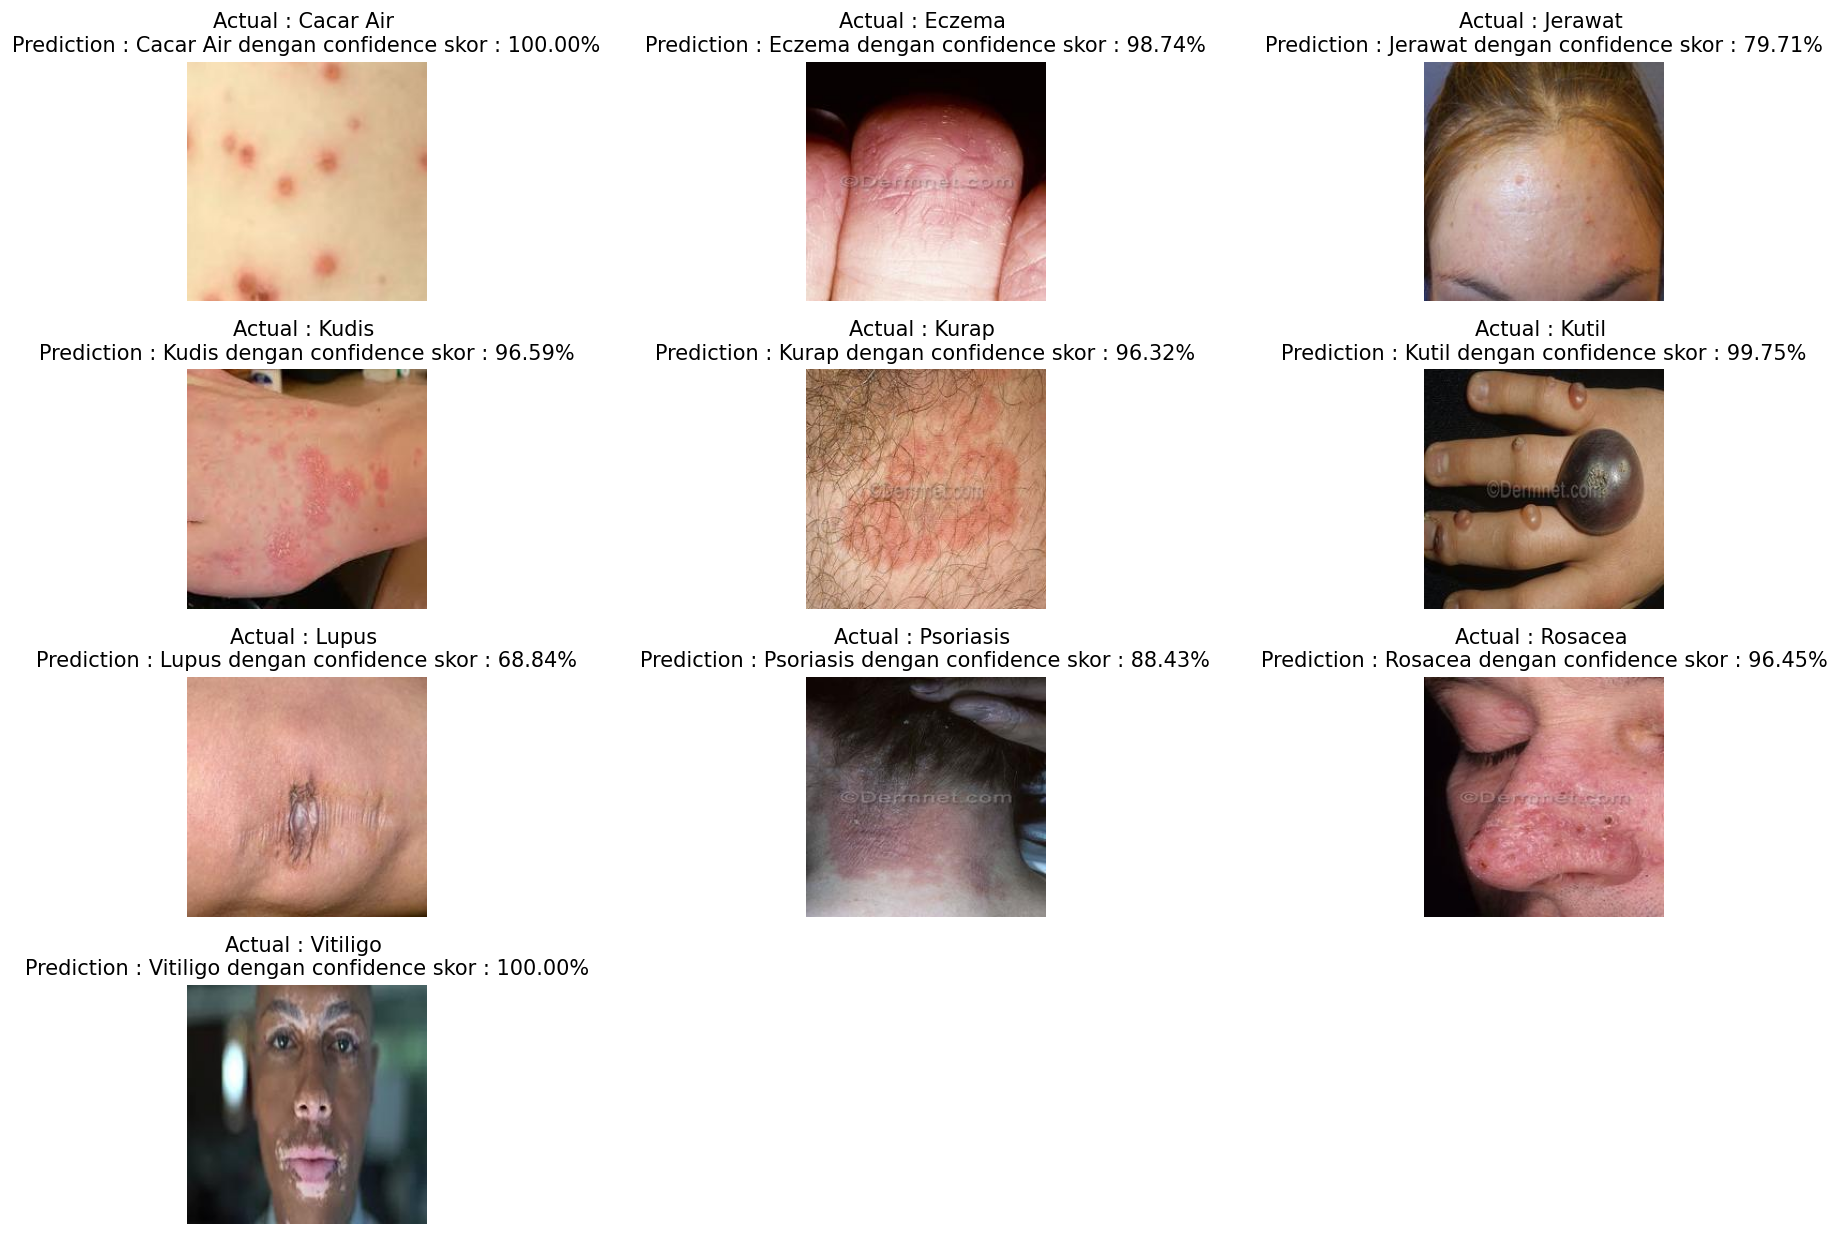

In [ ]:
inference_model_test(model, 'dataset_split/test')

In [ ]:
def inference_model_new_data(model, file_path):
  plt.figure(figsize=(15,10), dpi=125)
  ncols = 3
  nrows = math.ceil(len(class_names)/ncols)

  image = mpimg.imread(file_path)

  # Lakukan visualisasi
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(image)

  # Lakukan prediksi ke ML
  image_resized = tf.image.resize(image, size=[224,224])
  image_expanded = tf.expand_dims(image_resized, axis=0)
  image_preprocessed = tf.keras.applications.mobilenet.preprocess_input(image_expanded)

  prediction  = np.argmax(model.predict(image_preprocessed, verbose=0), axis=-1)
  preds_label = class_names[int(prediction)]
  confidence_score = np.max(model.predict(image_preprocessed))

  plt.title(f'Prediction : {preds_label} \ndengan confidence skor : {confidence_score *100 :.2f}%')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
inference_model_new_data(model, '/content/contoh gambar kutil dari alodokter.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-16-a8ea4febb567>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  preds_label = class_names[int(prediction)]
